In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
df=pd.read_csv("kyphosis.csv")

In [23]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.3+ KB


In [24]:
import seaborn as sns

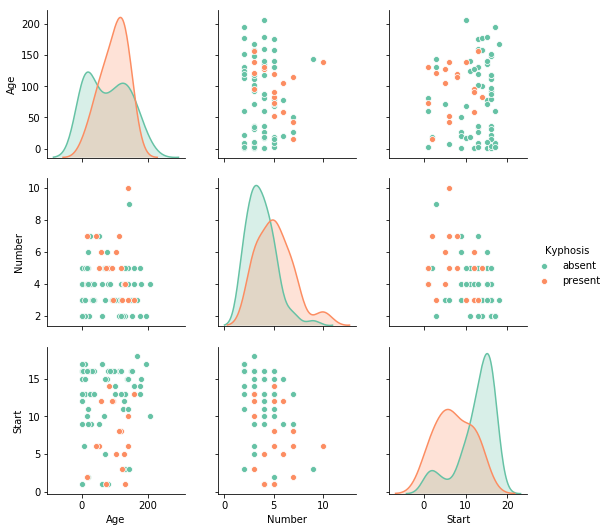

In [25]:
sns.pairplot(df,hue="Kyphosis",palette="Set2")

In [26]:
df['Kyphosis']=df['Kyphosis'].map({'absent':0,'present':1})
df['Kyphosis']

0     0
1     0
2     1
3     0
4     0
5     0
6     0
7     0
8     0
9     1
10    1
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    1
22    1
23    0
24    1
25    0
26    0
27    0
28    0
29    0
     ..
51    0
52    1
53    0
54    0
55    0
56    0
57    1
58    0
59    0
60    1
61    1
62    0
63    0
64    0
65    0
66    0
67    0
68    0
69    0
70    0
71    0
72    0
73    0
74    0
75    0
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split


In [28]:
x=df.drop("Kyphosis",axis=1)
y=df['Kyphosis']
x
y

0     0
1     0
2     1
3     0
4     0
5     0
6     0
7     0
8     0
9     1
10    1
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    1
22    1
23    0
24    1
25    0
26    0
27    0
28    0
29    0
     ..
51    0
52    1
53    0
54    0
55    0
56    0
57    1
58    0
59    0
60    1
61    1
62    0
63    0
64    0
65    0
66    0
67    0
68    0
69    0
70    0
71    0
72    0
73    0
74    0
75    0
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int64

In [29]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30)

# decision tree

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
model=DecisionTreeClassifier(random_state=42)

In [33]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [34]:
prediction=model.predict(xtest)

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
print(classification_report(prediction,ytest))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.67      0.50      0.57         4

   micro avg       0.88      0.88      0.88        25
   macro avg       0.79      0.73      0.75        25
weighted avg       0.87      0.88      0.87        25



In [37]:
print(confusion_matrix(prediction,ytest))

[[20  1]
 [ 2  2]]


In [38]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
features=list(df.columns[1:])

In [39]:
features
import os
os.environ["PATH"]+= os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

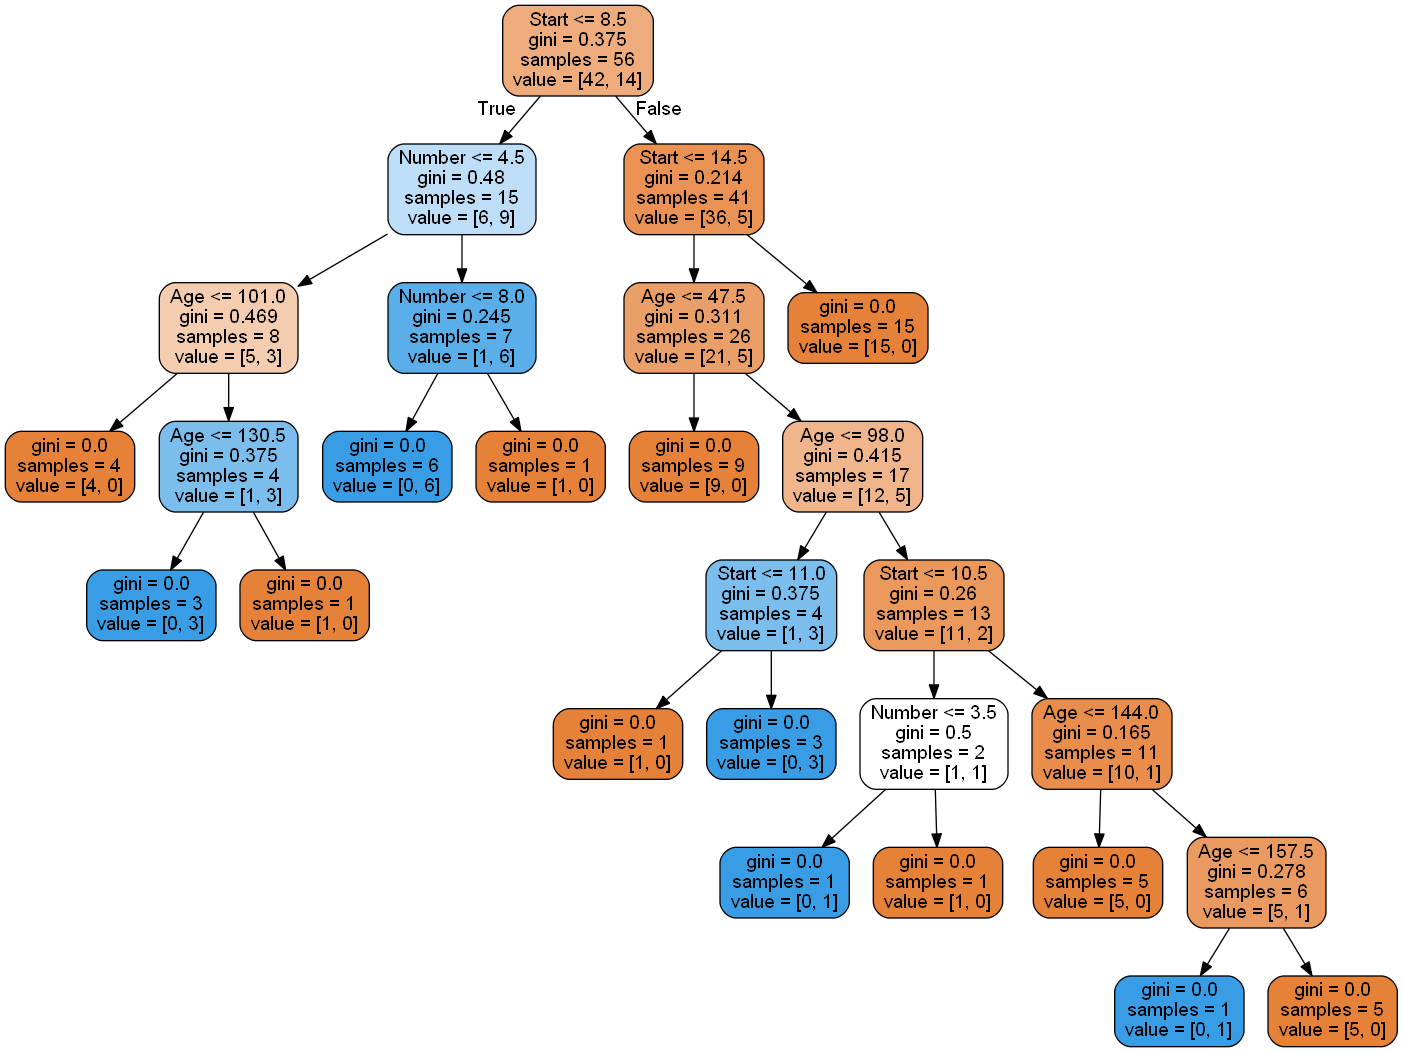

In [40]:
dot_data=StringIO()
export_graphviz(model,out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# random forest



In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
model_1=RandomForestClassifier(n_estimators=100)


In [44]:
X=df.drop("Kyphosis",axis=1)
y=df['Kyphosis']

In [45]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [46]:
df.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

In [47]:
model_1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [48]:
predictionRF=model_1.predict(X_test)

predictionRF

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1], dtype=int64)

In [49]:
predictionRF

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1], dtype=int64)

In [50]:
y_test

30    0
0     0
22    1
31    0
18    0
28    0
10    1
70    0
4     0
12    0
49    0
33    0
67    0
35    0
68    0
45    1
73    0
61    1
55    0
40    1
9     1
64    0
5     0
47    0
34    0
62    0
42    0
Name: Kyphosis, dtype: int64

In [51]:
from sklearn.metrics import confusion_matrix,auc,roc_curve,roc_auc_score

In [52]:
confusion_matrix(y_test,predictionRF)

array([[20,  1],
       [ 5,  1]], dtype=int64)

In [53]:
fpr,tpr,threshold=roc_curve(y_test,predictionRF,pos_label=1)

In [54]:
auc(fpr,tpr)

0.5595238095238095

In [55]:
auc=roc_auc_score(y_test,predictionRF)
auc

0.5595238095238095

In [56]:
from sklearn.metrics import classification_report

In [57]:
print(classification_report(y_test,predictionRF))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87        21
           1       0.50      0.17      0.25         6

   micro avg       0.78      0.78      0.78        27
   macro avg       0.65      0.56      0.56        27
weighted avg       0.73      0.78      0.73        27



In [58]:
from sklearn.metrics import roc_curve

In [59]:
from IPython.display import Image
import pydotplus
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
features_1=list(df.columns[1:])

In [60]:
features_1

['Age', 'Number', 'Start']

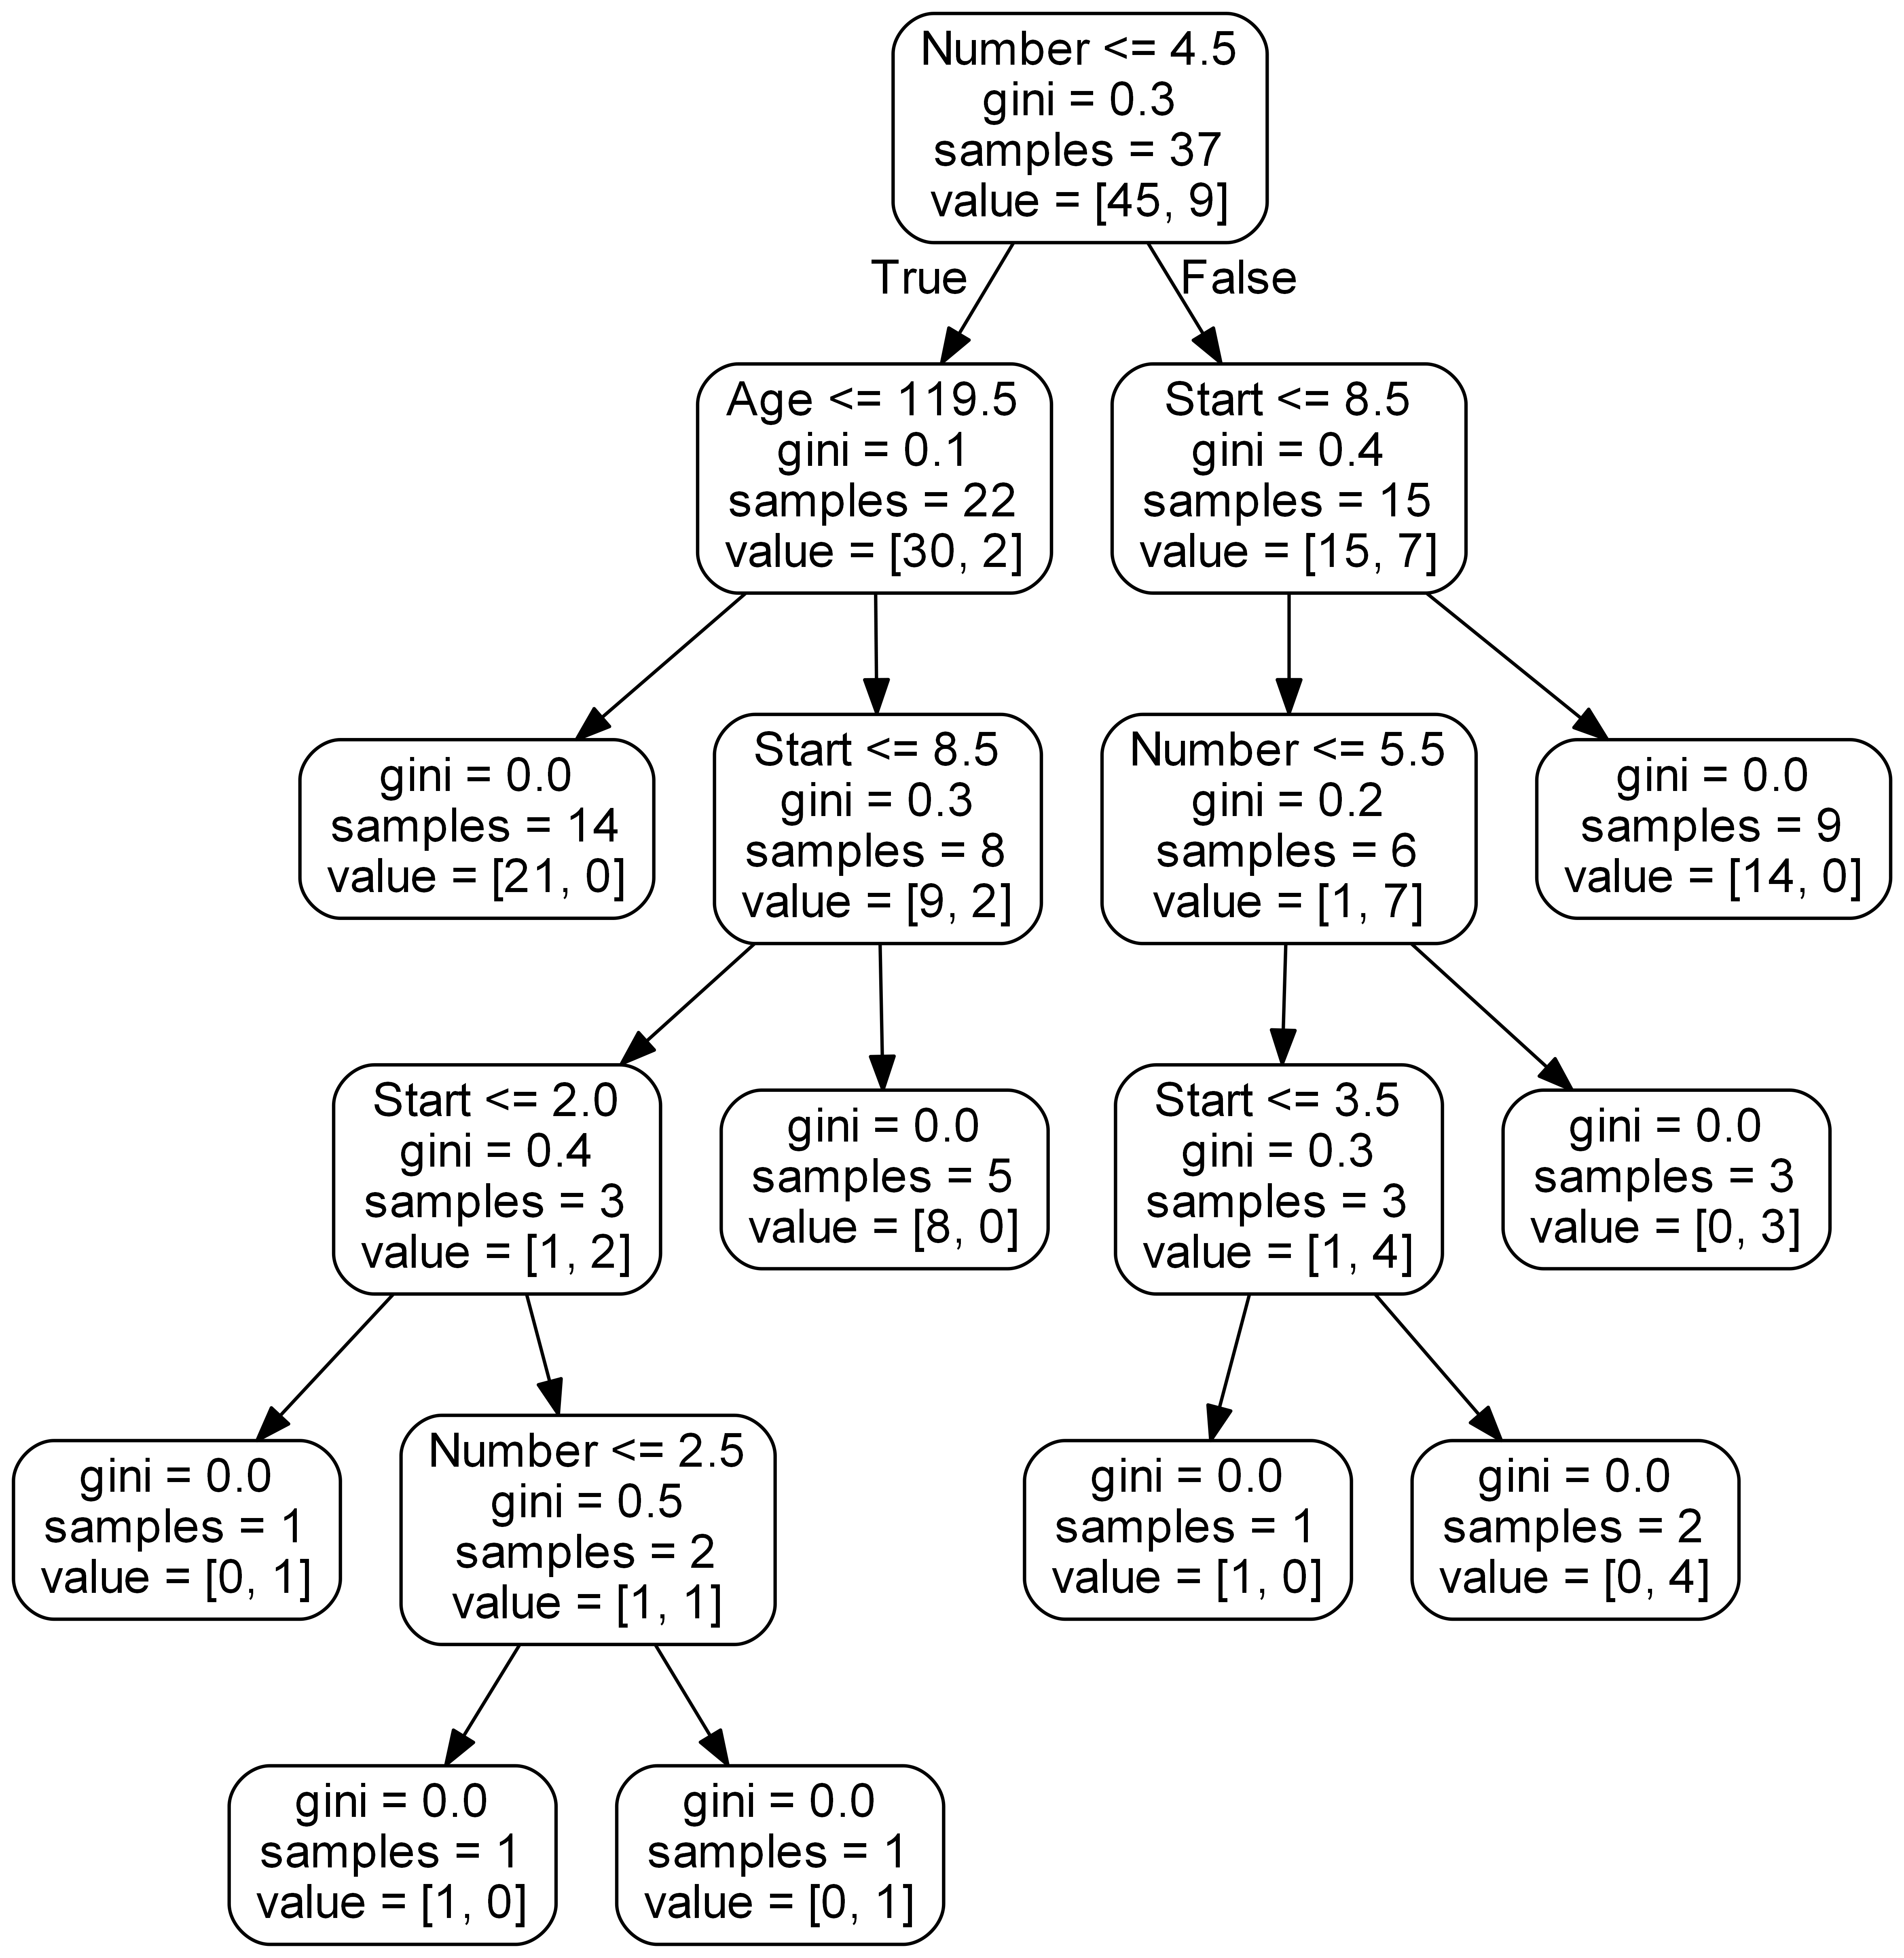

In [61]:

# Pull out one tree from the forest
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydotplus
# Pull out one tree from the forest
tree = model_1.estimators_[7]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = features_1, rounded = True, precision = 1)
# Use dot file to create a graph
graph = pydotplus.graph_from_dot_file('tree.dot')
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [76]:
from sklearn.ensemble import RandomForestClassifier
model_2=RandomForestClassifier(max_depth=None,n_estimators=10)
model_2.fit(X_train,y_train)
estimator_nonlimited=model_2.estimators_[5]
export_graphviz(estimator_nonlimited,out_file="random_forest.dot",precision=1,feature_names=features_1,class_names=["present","absent"],rounded=True,filled=True)
graph = pydotplus.graph_from_dot_file('random_forest.dot')

!dot -Tpng random_forest.dot -o random_forest.png -Gdpi=600

Image(filename="random_forest.png")